In [1]:
# Modulos mas basicos
import numpy as np
import os
import time
import pandas as pd



In [2]:
# Pandas : Proporciona un par de estructuras de datos de naturaleza matricial
  # Series
  # DataFrame

# Unidimensional
help(pd.Series)

Help on class Series in module pandas.core.series:

class Series(pandas.core.base.IndexOpsMixin, pandas.core.generic.NDFrame)
 |  Series(data=None, index=None, dtype: 'Dtype | None' = None, name=None, copy: 'bool | None' = None, fastpath: 'bool' = False) -> 'None'
 |  
 |  One-dimensional ndarray with axis labels (including time series).
 |  
 |  Labels need not be unique but must be a hashable type. The object
 |  supports both integer- and label-based indexing and provides a host of
 |  methods for performing operations involving the index. Statistical
 |  methods from ndarray have been overridden to automatically exclude
 |  missing data (currently represented as NaN).
 |  
 |  Operations between Series (+, -, /, \*, \*\*) align values based on their
 |  associated index values-- they need not be the same length. The result
 |  index will be the sorted union of the two indexes.
 |  
 |  Parameters
 |  ----------
 |  data : array-like, Iterable, dict, or scalar value
 |      Contains

In [3]:
# Veamos un ejemplo para definir un objeto de tipo Series
s1 = pd.Series()

In [4]:
type(s1)

pandas.core.series.Series

In [5]:
# Definamos un objeto de tipo Series con algo de informacion
s2 = pd.Series(data = np.random.randn(4))
s2

0   -0.782373
1   -1.144400
2    0.710074
3    0.022921
dtype: float64

In [7]:
# Agreguemos algunas propiedades mas a un objeto de tipo Series
s3 = pd.Series(data = np.random.normal(9.8, 2.71, 10),
               name = "DatosNormales",
               index = ["a1","a2","a3", "a4", "a5", "a6", "a7", "a8", "a9", "a10"])
s3

a1      8.748358
a2     12.667843
a3     10.698432
a4      9.724834
a5      8.556093
a6      9.167513
a7      7.705556
a8      8.029953
a9     10.045372
a10    10.271642
Name: DatosNormales, dtype: float64

In [8]:
# Acceso a los elementos
s2[2]

0.7100740211951658

In [9]:
# Al igual que como lo haciamos en un diccionario
# acceso al elemento de indice "a7" de s3
s3["a7"]


7.705555931627526

In [10]:
# Podemos acceder a un subconjunto de los elementos que componen a un objeto de tipo series
s2[[1,3]]

1   -1.144400
3    0.022921
dtype: float64

In [11]:
# Construyamos un diccionario con las siguientes caracteristicas:
  # La llave debe de ser un numero entero, el valor correspondiente un dato de tipo bool
    # Cuanto la llave sea un numero primo => el valor debe de ser True
    # Cuanto la llave no sea un numero primo => el valor debe ser False

# Paso 1 : Implementar un funcion que me diga si un entero (argumento) es un numero primo o no
def MakeValues(num):
  for n in range(2,num):
    if num%n ==0 :
      return False
  return True

# Paso 2 : Construccion del diccionario
# Dados dos argumentos de tipo entero (a y b con a<b) , las llaves de mi diccionario
# seran todos los enteros en [a,b]. Y sus correspondientes valores siguen la regla
# de construccion del diccionario
def MakeDict4Series(a,b):
  output ={}
  for key in range(a,b+1):
    output[key] = MakeValues(key)
  return output

# Paso 3 : COnstruccion del objeto de tipo Series
Primos = pd.Series(data = MakeDict4Series(666, 999),
                   name = "NumerosPrimos")

Primos

666    False
667    False
668    False
669    False
670    False
       ...  
995    False
996    False
997     True
998    False
999    False
Name: NumerosPrimos, Length: 334, dtype: bool

In [15]:
# Operaciones vectorizadas : Herencia del modulo numpy
s4 = s3*100
s4

a1      874.835761
a2     1266.784260
a3     1069.843210
a4      972.483443
a5      855.609342
a6      916.751309
a7      770.555593
a8      802.995270
a9     1004.537228
a10    1027.164221
Name: DatosNormales, dtype: float64

In [16]:
# Otras operaciones vectorizadas
s5 = 0.3*np.sin(s3*np.pi/180) -0.01*np.exp(s3**(0.7))
s5

a1    -0.914067
a2    -3.636581
a3    -1.858396
a4    -1.312426
a5    -0.849781
a6    -1.069436
a7    -0.610839
a8    -0.693856
a9    -1.473610
a10   -1.597898
Name: DatosNormales, dtype: float64

In [19]:
# Concatenemos s3, s4 y s5 usando pd.concat
df1 = pd.concat([s3,s4,s5], axis = 1)
df1

DatosNormales  DatosNormales  DatosNormales
a1        8.748358     874.835761      -0.914067
a2       12.667843    1266.784260      -3.636581
a3       10.698432    1069.843210      -1.858396
a4        9.724834     972.483443      -1.312426
a5        8.556093     855.609342      -0.849781
a6        9.167513     916.751309      -1.069436
a7        7.705556     770.555593      -0.610839
a8        8.029953     802.995270      -0.693856
a9       10.045372    1004.537228      -1.473610
a10      10.271642    1027.164221      -1.597898

In [20]:
type(df1)

pandas.core.frame.DataFrame

In [21]:
# Carguemos algunos modulos de visualizacion
import matplotlib.pyplot as plt
import seaborn as sns

# Carguemos este dataset
# https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
data = pd.read_csv("archive.zip")

# Mostremos algo de informacion
print("Filas - Columnas", data.shape)


Filas - Columnas (284807, 31)


In [22]:
# Nombres de las columnas
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [24]:
# Tipo de dato de cada columna
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [26]:
# Valores faltantes
data.isnull().sum().sum()

0

Class
0    284315
1       492
Name: count, dtype: int64


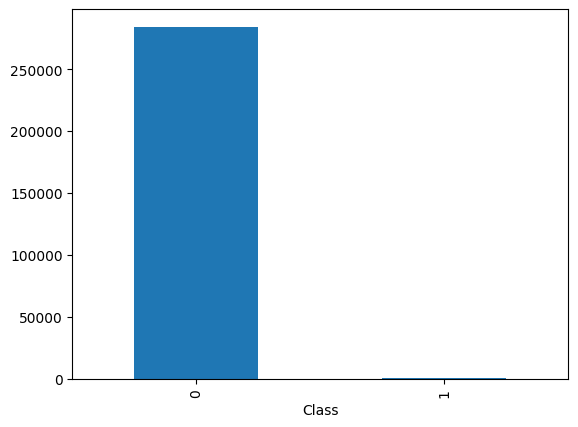

In [29]:
# MOstremos la distribucion de valores de la variable dependiente Class
print(data.Class.value_counts())

# Mostremos un diagrama de barras
data.Class.value_counts().plot(kind = "bar")
plt.show()


In [31]:
# Construyamos un modelo base de clasificacion
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Paso 1 : Definamos quienes son las variables independientes y quien es
# la variable dependiente
x = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Paso 2: Particionamiento de los datos
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.15)

# Paso 3: Instanciamos la clase a ajustar
modelBase = LogisticRegression(max_iter = 1000)

# Paso 4 : Ajustamos el modelo base (modelBase) usando los datos de entrenamiento
modelBase.fit(x_train,y_train)

# Paso 5 : Construyamos pronosticos de la variable dependiente
y_predict = modelBase.predict(x_test)

# Paso 6 : Calculemos un indicador de calidad
# Calculo del porcentaje de desaciertos
metricaBase = metrics.accuracy_score(y_test, y_predict)
100 - metricaBase*100

0.07724357473900056

In [32]:
# En la celda anterior mostramos que el modelo base tiene una "!precision" muy buena
# (¿Existira sobreentrenamiento?)
# Veamos como es que se entreno/ajusto el modelo : Para ello mostremos la distribucion de
# valores de y_train
y_train.value_counts()

Class
0    241663
1       422
Name: count, dtype: int64

In [33]:
# Mostremos el  numero de "1"'s en y_test
y_test.value_counts()

Class
0    42652
1       70
Name: count, dtype: int64

# Construccion de un modelos "mas realista"

In [34]:
# En vista de que contamos con 492 transacciones fraudulentas, obtengamos una muestra
# de transacciones no fraudulentas de tamaño 492
Data_NoFraudulenta = data[data.Class == 0].sample(n = 492)
Data_Fraudulenta = data[data.Class == 1]

# Concatenemos los objetos anteriores
Data2 = pd.concat([Data_NoFraudulenta, Data_Fraudulenta], axis = 0)

In [36]:
# Mostremos la distribucion de la columna Class del objeto Data2
Data2.Class.value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [44]:
# Con Data2 (dataset balanceado) vamos a contruir otro modelo base
x2 = Data2.iloc[:, :-1]
y2 = Data2.iloc[:,-1]

#
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2, train_size = 0.85)

#
modelBase2 = LogisticRegression(max_iter = 1000)

#
modelBase2.fit(x2_train, y2_train)

#
y2_predict = modelBase2.predict(x2_test)

#
metricaBase2 = metrics.accuracy_score(y2_test, y2_predict)
100 - 100*metricaBase2




4.054054054054063

In [42]:
# Guardemos este modelo Base (que por suerte) que tuvo un porcentaje de desaciertos inferior
# al 5% (4.729729729729726)
import pickle
ArchivoModelBase2 = "modelBase2_suerte.pkl"
with open(ArchivoModelBase2, "wb") as modeloBase2_suerte:
  pickle.dump(modelBase2, modeloBase2_suerte)

os.listdir()

['.config', 'archive.zip', 'modelBase2_suerte.pkl', 'sample_data']

# Estrategia 1
Manteniendo constante/inalterable el objeto Data2. Analicemos la
estabilidad de nuestro porcentaje de desaciertos


Los porcentajes de desaciertos provienen de una distribucion normal
Porcentaje de desacierto :  7.122297297297282


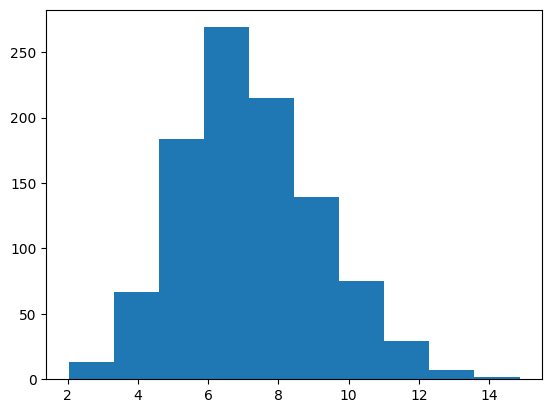

In [45]:
def AnalisisModelBase2():
  # Con Data2 (dataset balanceado) vamos a contruir otro modelo base
  x2 = Data2.iloc[:, :-1]
  y2 = Data2.iloc[:,-1]

  #
  x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2, train_size = 0.85)

  #
  modelBase2 = LogisticRegression(max_iter = 1000)

  #
  modelBase2.fit(x2_train, y2_train)

  #
  y2_predict = modelBase2.predict(x2_test)

  #
  metricaBase2 = metrics.accuracy_score(y2_test, y2_predict)
  return 100 - 100*metricaBase2

# Ejecutemos esta funcion 1000 veces y guardemos los porcentajes de desacierto
ListaDesaciertosModelBase2 = list()
for execution in range(1000):
  ListaDesaciertosModelBase2.append(AnalisisModelBase2())

# Mostremos un histograma de como se distribuyen estos 1000 porcentajes de desaciertos
plt.hist(ListaDesaciertosModelBase2)

# Test de Normalidad : Test de Shappiro-Wilk
from scipy import stats
TestNormalidad = stats.shapiro(ListaDesaciertosModelBase2)

# Si el p_value es menor que 0.05 entonces los valores almacenados en ListaDesaciertosModelBase2
# provienen de una distribucion normal. En cuyo caso tenemos herramientas para considerar
# adecuado a la media de estos valores como un buen representante
if TestNormalidad[1]<0.05:
  print("Los porcentajes de desaciertos provienen de una distribucion normal")
  print("Porcentaje de desacierto : " , sum(ListaDesaciertosModelBase2)/len(ListaDesaciertosModelBase2))
else:
  print("Los porcentajes de desaciertos 'NO' provienen de una distribucion normal")

# Estrategia 2
Modificar el objeto Data2. Analicemos la
estabilidad de nuestro porcentaje de desaciertos


Los porcentajes de desaciertos provienen de una distribucion normal
Porcentaje de desacierto :  6.869594594594581


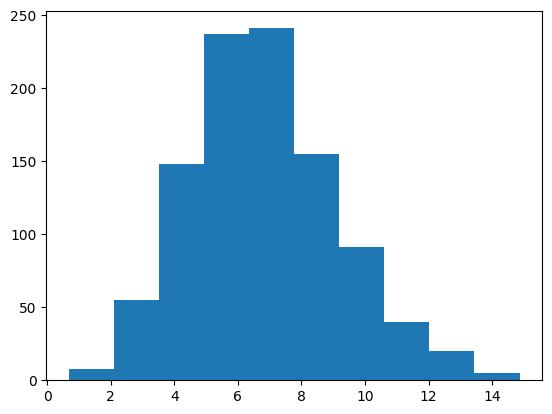

In [46]:
def AnalisisModelBase2_Ver2():
  # Construyamos un nuevo Data2 para cada ejecucion de esta funcion
  Data_NF = data[data.Class == 0].sample(n = 492)
  Data_F = data[data.Class == 1]

  # Redefinimos Data2
  Data2 = pd.concat([Data_NF, Data_F], axis = 0)

  # Con Data2 (dataset balanceado) vamos a contruir otro modelo base
  x2 = Data2.iloc[:, :-1]
  y2 = Data2.iloc[:,-1]

  #
  x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2, train_size = 0.85)

  #
  modelBase2 = LogisticRegression(max_iter = 1000)

  #
  modelBase2.fit(x2_train, y2_train)

  #
  y2_predict = modelBase2.predict(x2_test)

  #
  metricaBase2 = metrics.accuracy_score(y2_test, y2_predict)
  return 100 - 100*metricaBase2

# Ejecutemos esta funcion 1000 veces y guardemos los porcentajes de desacierto
ListaDesaciertosModelBase2_Ver2 = list()
for execution in range(1000):
  ListaDesaciertosModelBase2_Ver2.append(AnalisisModelBase2_Ver2())

# Mostremos un histograma de como se distribuyen estos 1000 porcentajes de desaciertos
plt.hist(ListaDesaciertosModelBase2_Ver2)

# Test de Normalidad : Test de Shappiro-Wilk
from scipy import stats
TestNormalidad = stats.shapiro(ListaDesaciertosModelBase2_Ver2)

# Si el p_value es menor que 0.05 entonces los valores almacenados en ListaDesaciertosModelBase2
# provienen de una distribucion normal. En cuyo caso tenemos herramientas para considerar
# adecuado a la media de estos valores como un buen representante
if TestNormalidad[1]<0.05:
  print("Los porcentajes de desaciertos provienen de una distribucion normal")
  print("Porcentaje de desacierto : " , sum(ListaDesaciertosModelBase2_Ver2)/len(ListaDesaciertosModelBase2_Ver2))
else:
  print("Los porcentajes de desaciertos 'NO' provienen de una distribucion normal")

In [49]:
# Estrategia 3 : Barrido de Hiperparametros
# Construyamos un nuevo Data2 para cada ejecucion de esta funcion
Data_NF = data[data.Class == 0].sample(n = 492)
Data_F = data[data.Class == 1]

# Redefinimos Data2
Data2 = pd.concat([Data_NF, Data_F], axis = 0)

# Cargamos la clase GridSearchCV
from sklearn.model_selection import GridSearchCV

ModeloBase4GS = LogisticRegression()
DictHP_RegLog_Base = {"penalty":["l1", "l2", "elasticnet", None],
                      "C" : np.linspace(0,20, 40),
                      "solver":["lbfgs", "liblinear", "newton-cg", "sag", "saga", "newton-cholesky"]}

# Configuramos el barrido de Hiperparametros
ModRegLogBase_GS = GridSearchCV(estimator = ModeloBase4GS,
                                param_grid = DictHP_RegLog_Base,
                                cv = 3,
                                scoring = "accuracy",
                                n_jobs = -1)

 # Con Data2 (dataset balanceado) vamos a contruir otro modelo base
x2 = Data2.iloc[:, :-1]
y2 = Data2.iloc[:,-1]
  #
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2, train_size = 0.85)

# Ajustar nuestros modelos planteados por GridSearchCV
inicio = time.time()
HistoriaAjusteRegLogBase = ModRegLogBase_GS.fit(x2_train, y2_train)
fin = time.time()

print("Tiempo de Procesamiento ", fin - inicio )

Tiempo de Procesamiento  68.00851321220398


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1359 fits failed out of a total of 2880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
72 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1160, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sk

In [51]:
# El mejor porcentaje de desaciertos (en funcion del mejor score)
100  - 100*HistoriaAjusteRegLogBase.best_score_

5.623458222669171

In [52]:
# Parametros del mejor modelo
HistoriaAjusteRegLogBase.best_params_

{'C': 14.358974358974358, 'penalty': 'l1', 'solver': 'liblinear'}

In [ ]:
# tarea:
  # Repetir considerando un modelo de tipo arbol de decision
  # Repetir considerando un modelo de tipo bosque aleatorio
  # Repetir considerando un modelo de tipo XGBoost